# Metrici de performanta pentru clasificatori: accuracy, precision, recall, F1 score

Resurse:
* [Understanding Accuracy, Recall, Precision, F1 Scores, and Confusion Matrices](https://towardsdatascience.com/understanding-accuracy-recall-precision-f1-scores-and-confusion-matrices-561e0f5e328c)
* [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)

In [1]:
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
print(f'numpy version: {np.__version__}')
print(f'sklearn version: {sklearn.__version__}')

numpy version: 1.19.2
sklearn version: 0.24.1


# Matrice de confuzie

Sa presupunem ca avem de construit un clasificator care sa eticheteze date care apartin la doua clase: 0 (negativ) si 1 (pozitiv). Exemple: mail spam (pozitiv) versus nonspam (negativ), o imagine contine un catelus (pozitiv) sau nu contine etc. 

Clasificatorul face anumite predictii de clasa, care pot fi sau nu conforme cu realitatea. Se obtine urmatoarea **matrice de confuzie**:

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-9wq8{border-color:inherit;text-align:center;vertical-align:middle}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
@media screen and (max-width: 767px) {.tg {width: auto !important;}.tg col {width: auto !important;}.tg-wrap {overflow-x: auto;-webkit-overflow-scrolling: touch;}}</style>
<div class="tg-wrap"><table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky"></th>
    <th class="tg-c3ow" colspan="3"><span style="font-weight:bold">Prezis (clasificat, inferat)</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-7btt">Positive</td>
    <td class="tg-7btt">Negative</td>
    <td class="tg-baqh"><span style="font-weight:bold">Total</span></td>
  </tr>
  <tr>
    <td class="tg-9wq8" rowspan="2"><span style="font-weight:bold">Actual </span><br><span style="font-weight:bold">(real, ground</span><br><span style="font-weight:bold">truth)</span></td>
    <td class="tg-7btt">Positive</td>
    <td class="tg-c3ow">True positive<br>(TP)</td>
    <td class="tg-c3ow">False negative <br>(FN)</td>
    <td class="tg-baqh"><span style="font-weight:bold">P</span></td>
  </tr>
  <tr>
    <td class="tg-7btt">Negative</td>
    <td class="tg-c3ow">False positive <br>(FP)</td>
    <td class="tg-c3ow">True negative<br>(TN)</td>
    <td class="tg-baqh"><span style="font-weight:bold">N</span></td>
  </tr>
</tbody>
</table></div>

Avem:
* P = TP + FN
* N = FP + TN

Ne dorim ca in afara diagonalei (valorile FP, FN) sa fie cat mai mici, ideal 0. 

Pe baza matricei de confuzie se calculeaza in mod direct acuratetea:
$$
Accuracy = \frac{TP+TN}{P+N}
$$

Acuratetea poate fi inselatoare in cazurile in care clasele sunt debalansate (numar foarte mare de exemplare intr-o clasa in comparatie cu numarul de date din cealalta clasa).

# Exemplu numeric 1

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
@media screen and (max-width: 767px) {.tg {width: auto !important;}.tg col {width: auto !important;}.tg-wrap {overflow-x: auto;-webkit-overflow-scrolling: touch;}}</style>
<div class="tg-wrap"><table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky"></th>
    <th class="tg-c3ow" colspan="3"><span style="font-weight:bold">Prezis (clasificat, inferat)</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-7btt">Positive</td>
    <td class="tg-7btt">Negative</td>
    <td class="tg-c3ow"><span style="font-weight:bold">Total</span></td>
  </tr>
  <tr>
    <td class="tg-c3ow" rowspan="2"><span style="font-weight:bold">Actual </span><br><span style="font-weight:bold">(real, ground</span><br><span style="font-weight:bold">truth)</span></td>
    <td class="tg-7btt">Positive</td>
    <td class="tg-c3ow">998</td>
    <td class="tg-c3ow">0</td>
    <td class="tg-c3ow"><span style="font-weight:bold">P=998</span></td>
  </tr>
  <tr>
    <td class="tg-7btt">Negative</td>
    <td class="tg-c3ow">1</td>
    <td class="tg-c3ow">1</td>
    <td class="tg-c3ow"><span style="font-weight:bold">N=2</span></td>
  </tr>
</tbody>
</table></div>

In acest caz, acuratetea este: 
$$
Accuracy = \frac{998+1}{1000}=0.999 = 99.9\%
$$

Mai mult, pentru o astfel de situatie debalansata, un clasificator care prrezice mereu "pozitiv" are rata de succes de 99.8%!

Daca acele 2 cazuri negativ sunt insa importante (incercare de frauda/intruziune, mail legitim si crucial care e clasificat eronat ca fiind spam), clasificarea este de fapt slaba. Precision, recall si F1 score sunt niste metrici senzitive la clase dezechilibrate. 

# Precision

Definitia preciziei unui clasificator binar (precision) este:
$$
Precision = \frac{TP}{TP+FP}
$$
Pentru exemplul numeric de mai sus obtinem:
$$
Precision = \frac{998}{998+1}=0.998998998998999=98.899\%
$$

# Recall

Recall se defineste ca:
$$
Recall = \frac{TP}{TP+FN} = \frac{TP}{P} 
$$
Pentru exemplul numeric de mai sus obtinem:
$$
Recall = \frac{998}{998}=1
$$

# F1 score

Scorul F1 se defineste ca medie armonica a precision si recall:
$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$
Pentru exemplul numeric de mai sus obtinem:
$$
F1 = 2 \cdot \frac{\frac{998}{999} \cdot 1}{\frac{998}{999} + 1} \approx 0.99949
$$

# Exemplu numeric 2

In [3]:
# Actual Value
labels =      np.array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1])
# Predicted Value
predictions = np.array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

## Calcul folosind numpy

In [4]:
# calcul manual de TP, FP etc

accuracy = np.sum(labels == predictions)
positive_mask = labels == 1 
negative_mask = labels == 0
P = np.sum(positive_mask)
N = np.sum(negative_mask)
TP = np.sum(predictions[positive_mask] == 1)
print(f'true positive: {TP}')
TN = np.sum(predictions[negative_mask] == 0)
print(f'true negative: {TN}')
FP = np.sum(predictions[negative_mask] == 1)
print(f'false positive: {FP}')
FN = np.sum(predictions[positive_mask] == 0)
print(f'false negative: {FN}')

accuracy = (TP+TN)/(P+N)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'F1 score: {2 * precision * recall / (precision + recall)}')

true positive: 3
true negative: 0
false positive: 3
false negative: 4
accuracy: 0.3
precision: 0.5
recall: 0.42857142857142855
F1 score: 0.4615384615384615


In [5]:
assert TP + FN == P, 'TP si FN trebuie sa dea P'
assert TN + FP == N, 'TN si FP trebuie sa dea N'

# Calcul folosind sklearn

In [6]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(labels, predictions)
print(confusion)
# FN = confusion[1][0]
# TN = confusion[0][0]
# TP = confusion[1][1]
# FP = confusion[0][1]

[[0 3]
 [4 3]]


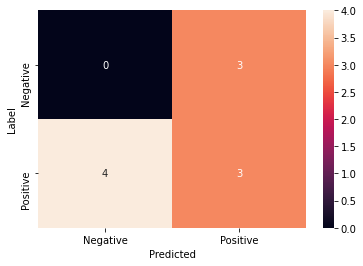

In [7]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'])
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

In [8]:
print(f'Acuratete: {accuracy_score(labels , predictions)}')

Acuratete: 0.3


In [9]:
print(f'Precision: {precision_score(labels , predictions)}')

Precision: 0.5


In [10]:
print(f'Recall: {recall_score(labels , predictions)}')

Recall: 0.42857142857142855


In [11]:
print(f'F1 score: {f1_score(labels, predictions)}')

F1 score: 0.4615384615384615


In [12]:
from sklearn.metrics import classification_report
print(classification_report(labels,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.43      0.46         7

    accuracy                           0.30        10
   macro avg       0.25      0.21      0.23        10
weighted avg       0.35      0.30      0.32        10

